1. [Introduction to Keras](#Introduction to Keras)
    1. [Sequential Model](#Sequential Model)
    2. [Layer](#Layer)
    3. [Convolutions](#convolutions)
    4. [Pooling](#Pooling)

# Introduction to Keras <a name='Introduction to Keras'></a>

### 1. Sequential Model <a name='Sequential Model'></a>

The [keras.models.Sequential](https://keras.io/models/sequential/) class is a wrapper for the neural network model. It provides common functions like __fit()__, __evaluate()__, and __compile()__. Let's start looking at the layers of the model to understand these functions.

```Python
from keras.models import Sequential

#Create the Sequential model
model = Sequential()
```

### 2. Layer <a name='Layer'></a>
A Keras layer is just like a neural network layer. There are fully connected layers, max pool layers, and activation layers. We can add a layer to the model using the model's __add()__ function. For example, a simple model would look like this:

```Python
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

#Create the Sequential model
model = Sequential()

#1st Layer - Add a flatten layer
model.add(Flatten(input_shape=(32, 32, 3)))

#2nd Layer - Add a fully connected layer
model.add(Dense(100))

#3rd Layer - Add a ReLU activation layer
model.add(Activation('relu'))

#4th Layer - Add a fully connected layer
model.add(Dense(60))

#5th Layer - Add a ReLU activation layer
model.add(Activation('relu'))
```

Keras will automatically infer the shape of all layers after the first layer. This means you only have to set the input dimensions for the first layer.

The first layer from above, __model.add(Flatten(input_shape=(32, 32, 3)))__, sets the input dimension to __(32, 32, 3)__ and output dimension to __(3072=32 x 32 x 3)__. The second layer takes in the output of the first layer and sets the output dimensions to (100). This chain of passing output to the next layer continues until the last layer, which is the output of the model.

---
__Quiz:__
Build a multi-layer feedforward neural network to classify traffic sign images using Keras.

- Set the first layer to a __Flatten()__ layer with the __input_shape__ set to (32, 32, 3).
- Set the second layer to a __Dense()__ layer with an output width of 128.
- Use a ReLU activation function after the second layer.
- Set the output layer width to 5, because for this data set there are only 5 classes.
- Use a softmax activation function after the output layer.
- Train the model for 3 epochs. You should be able to get over 50% training accuracy.

To get started, review the Keras documentation about models and layers. The Keras example of a [Multi-Layer Perceptron](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) network is similar to what we need to do here. Use that as a guide, but keep in mind that there are a number of differences.

In [ ]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
#tf.python.control_flow_ops = tf

with open('../../Data/Face/small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']
print(X_train.shape, y_train.shape)
print(np.max(X_train[0]), np.min(X_train[0]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]*255)
print(np.shape(X_train[0]))

In [ ]:
y_train

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
np.shape(y_one_hot)

### Face-object data

In [2]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf

with open('../../../Data/Face/faces-obj-32x32-features-norm.pkl', mode='rb') as f:
    X_train = pickle.load(f)
    X_train = X_train[:100]
    
with open('../../../Data/Face/faces-obj-32x32-labels-norm.pkl', mode='rb') as f:
    y_train = pickle.load(f)
    y_train = y_train[:100]

print(X_train.shape, y_train.shape)

(100, 32, 32, 3) (100, 2)


(32, 32, 3)


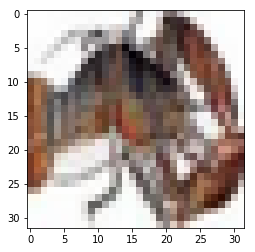

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(np.shape(X_train[0]))

In [4]:
y_train = np.asarray(y_train, dtype=np.uint8)
y_train[:10]

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [5]:
X_normalized = X_train
y_one_hot=y_train

## One hot encoding

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
y_one_hot[:10]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(y_one_hot)
y_one_hot = enc.transform(y_one_hot).toarray()
y_one_hot[:10]

In [ ]:
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

# TODO: Build the Fully Connected Neural Network in Keras Here
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

# preprocess data
# X_normalized = np.array(X_train / 255.0 - 0.5 )

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
# TODO: change the number of training epochs to 3
history = model.fit(X_normalized, y_one_hot, epochs=3, validation_split=0.2)

In [ ]:
model.predict_classes(X_train)

__Answer:__
```Python
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

# Build the Fully Connected Neural Network in Keras Here
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, epochs=3, validation_split=0.2)
```

### 3. convolutions <a name='convolutions'></a>

__Quiz:__
- Build from the previous network.
- Add a convolutional layer with 32 filters, a 3x3 kernel, and valid padding before the flatten layer.
- Add a ReLU activation after the convolutional layer.
- Train for 3 epochs again, should be able to get over 50% accuracy.

Hint 1: The Keras example of a convolutional neural network for MNIST would be a good example to review.
Hint 2: We can set the padding type by passing in a border_mode= argument to the Convolution2D() layer.

In [6]:
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D

# TODO: Build Convolutional Neural Network in Keras Here
model = Sequential()
#model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

# Preprocess data
# X_normalized = np.array(X_train / 255.0 - 0.5 )

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=10, validation_split=0.2)

Using TensorFlow backend.
/mnt/SharedData/Development/PythonEnvs/3.5PyEnv/lib/python3.5/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 1s 13ms/step - loss: 1.2863 - acc: 0.5000 - val_loss: 0.5865 - val_acc: 0.7000
Epoch 2/10
80/80 [==============================] - 0s 227us/step - loss: 0.6495 - acc: 0.5375 - val_loss: 0.6283 - val_acc: 0.5500
Epoch 3/10
80/80 [==============================] - 0s 227us/step - loss: 0.4837 - acc: 0.7625 - val_loss: 0.7989 - val_acc: 0.3000
Epoch 4/10
80/80 [==============================] - 0s 254us/step - loss: 0.3962 - acc: 0.7500 - val_loss: 0.4262 - val_acc: 0.8500
Epoch 5/10
80/80 [==============================] - 0s 234us/step - loss: 0.2211 - acc: 0.9875 - val_loss: 0.2611 - val_acc: 0.9500
Epoch 6/10
80/80 [==============================] - 0s 266us/step - loss: 0.1269 - acc: 0.9875 - val_loss: 0.3436 - val_acc: 0.7500
Epoch 7/10
80/80 [==============================] - 0s 240us/step - loss: 0.0807 - acc: 0.9750 - val_loss: 0.1678 - val_acc: 0.9500
Epoch 8/10
80/80 [===============

__Answer:__

```Python
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D

# Build Convolutional Neural Network in Keras Here
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=3, validation_split=0.2)
```

In [7]:
model.predict_classes(X_train)

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

### Pooling <a name='Pooling'></a>

__Quiz:__

- Build from the previous network
- Add a 2x2 max pooling layer immediately following the convolutional layer.
- Train for 3 epochs again to be able to get over 50% training accuracy.

In [ ]:
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# TODO: Build Convolutional Neural Network in Keras Here
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

# Preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=3, validation_split=0.2)

__Answer:__
```Python
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
tf.python.control_flow_ops = tf

with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# Build Convolutional Neural Network in Keras Here
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=3, validation_split=0.2)
```

### Dropout

__Quiz:__
- Build from the previous network.
- Add a dropout layer after the pooling layer. Set the dropout rate to 50%.

In [ ]:
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# TODO: Build Convolutional Pooling Neural Network with Dropout in Keras Here
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

# preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=3, validation_split=0.2)

# Test In Keras

Pick out your best model, it's time to test it!

- Try to get the highest validation accuracy possible. Feel free to use all the previous concepts and train for as many epochs as needed.
- Select the best model and train it one more time.
- Use the test data and the Keras [evaluate()](https://keras.io/models/model/#evaluate) method to see how well the model does.

In [ ]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
tf.python.control_flow_ops = tf

with open('datasets/small_traffic_set/small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# TODO: Build the Final Test Neural Network in Keras Here
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

# preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=10, validation_split=0.2)

with open('datasets/small_traffic_set/small_test_traffic.p', 'rb') as f:
    data_test = pickle.load(f)

X_test = data_test['features']
y_test = data_test['labels']

# preprocess data
X_normalized_test = np.array(X_test / 255.0 - 0.5 )
y_one_hot_test = label_binarizer.fit_transform(y_test)

print("Testing")

# TODO: Evaluate the test data in Keras Here
metrics = model.evaluate(X_normalized_test, y_one_hot_test)
# TODO: UNCOMMENT CODE
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))